In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# gas = ct.Solution("seiser.cti")  # Change .cti file to standard simple reaction
gas = ct.Solution("2S_methane.cti")
# gas.Y = np.array([0.5, 0, 0.5, 0, 0])
#gas.TP = 1200, 101325
#gas.TD = 1200, 10
def Q(t):
    t0 = 1e-5
    r  = 1e-6
    c  = 1e12
    return c * np.exp(-(t - t0)**2 / r**2) 
gas.Y = np.ones(gas.n_species) / gas.n_species
gas.TP = 500, 101325
# sim.advance(5.93e-6)
#gas.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
#np.save(".npy files/ini_mass_fraction.npy", gas.Y)
reactor = ct.IdealGasReactor(gas)
res = ct.Reservoir(gas)
wall = ct.Wall(res, reactor)
wall.set_heat_flux(Q)
wall.area = 1.0
exhaust_gas = ct.Solution("2S_methane.cti")
exhaust = ct.Reservoir(exhaust_gas)
mfc = ct.MassFlowController(upstream = reactor, downstream = exhaust, mdot = nozzle_nasa_mdot)  # mdot = nozzle_nasa_mdot
sim = ct.ReactorNet([reactor])
gas()


  CH4_CM2:

       temperature             500  K
          pressure          101325  Pa
           density        0.601279  kg/m^3
  mean mol. weight         24.6697  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -4.8775e+06       -1.203e+08     J
   internal energy      -5.046e+06       -1.245e+08     J
           entropy          9181.5        2.265e+05     J/K
    Gibbs function     -9.4682e+06       -2.336e+08     J
 heat capacity c_p            1490        3.676e+04     J/K
 heat capacity c_v            1153        2.844e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.128493         0.166667         -27.1319
               H2O       0.228229         0.166667          -82.821
               CH4       0.256291         0.166667         -42.2379
                CO      

/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  
/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


In [11]:
#gas.TP = 1200, 101325
#gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
n_t = 200
Pt = np.zeros(n_t)
Tt = np.zeros(n_t)
Yt = np.zeros((gas.n_species,n_t))
Rhot = np.zeros(n_t)  # New array for changing density of gases, representing incoming mass flux
for i in range(n_t):
    sim.advance((i+1)*1e-6)
    Pt[i] = gas.P
    Tt[i] = gas.T
    Yt[:,i] = gas.Y
    Rhot[i] = gas.density
    # gas.DP = 1, 1
    # gas.TP = 1200, 101325
    # print(nozzle_nasa_mdot((i+1)*1e-14))
gas()
# gas.DP


  CH4_CM2:

       temperature         2942.28  K
          pressure          578073  Pa
           density        0.528261  kg/m^3
  mean mol. weight         22.3555  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.1445e+06       -2.559e+07     J
   internal energy     -2.2388e+06       -5.005e+07     J
           entropy           12644        2.827e+05     J/K
    Gibbs function     -3.8346e+07       -8.572e+08     J
 heat capacity c_p          2393.8        5.351e+04     J/K
 heat capacity c_v          2021.9         4.52e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2    5.49201e-07      7.86104e-07         -42.8818
               H2O       0.417065         0.336093         -38.3194
               CH4       0.127127        0.0912287         -35.8621
                CO      

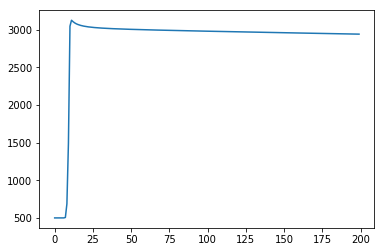

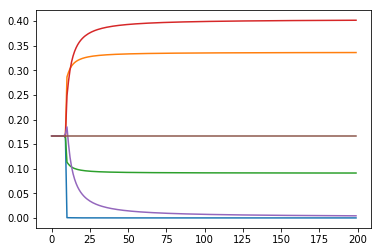

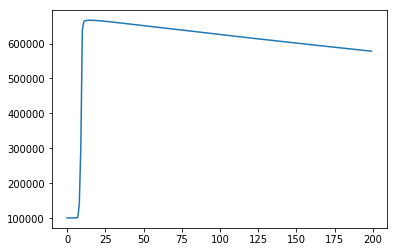

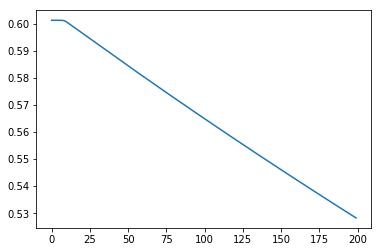

In [12]:
plt.plot(Tt)
plt.figure()
# plt.plot(Tt)
for i in range(gas.n_species):
    plt.plot(Yt[i,:])

plt.figure()
plt.plot(Pt)
plt.figure()
plt.plot(Rhot)
####

In [35]:
gas()


  CH4_CM2:

       temperature         1805.75  K
          pressure          473292  Pa
           density        0.779913  kg/m^3
  mean mol. weight         24.7405  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -4.4391e+06       -1.098e+08     J
   internal energy      -5.046e+06       -1.248e+08     J
           entropy           10973        2.715e+05     J/K
    Gibbs function     -2.4253e+07           -6e+08     J
 heat capacity c_p          2249.7        5.566e+04     J/K
 heat capacity c_v          1913.6        4.734e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2    1.34296e-08      1.73695e-08         -44.9901
               H2O       0.354877         0.258411         -42.6329
               CH4        0.19403         0.125817         -33.6762
                CO      

In [92]:
# gas = ct.Solution("2S_methane.cti")
# gas.Y = np.ones(gas.n_species) / gas.n_species
# gas.TP = 1200, 101325
# print(gas.density)
# r1 = ct.IdealGasReactor(gas)
# exhaust_gas = ct.Solution("2S_methane.cti")
# exhaust = ct.Reservoir(exhaust_gas)
# mfc = ct.MassFlowController(upstream = r1, downstream = exhaust, mdot = 1e4)  # mdot = nozzle_nasa_mdot
# sim = ct.ReactorNet([r1]) 


gas = ct.Solution("2S_methane.cti")
# gas.Y = np.array([0.5, 0, 0.5, 0, 0])
#gas.TP = 1200, 101325
#gas.TD = 1200, 10
def Q(t):
    t0 = 1e-5
    r  = 1e-6
    c  = 5e11
    return c * np.exp(-(t - t0)**2 / r**2) 
gas.Y = np.ones(gas.n_species) / gas.n_species
gas.TP = 1200, 101325
# sim.advance(5.93e-6)
#gas.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
# gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
#np.save(".npy files/ini_mass_fraction.npy", gas.Y)
r1 = ct.IdealGasReactor(gas)
res = ct.Reservoir(gas)
wall = ct.Wall(res, reactor)
wall.set_heat_flux(Q)
wall.area = 1.0
exhaust_gas = ct.Solution("2S_methane.cti")
exhaust = ct.Reservoir(exhaust_gas)
mfc = ct.MassFlowController(upstream = r1, downstream = exhaust, mdot = nozzle_nasa_mdot)  # mdot = nozzle_nasa_mdot
sim = ct.ReactorNet([r1])

Pt = np.zeros(n_t)
Tt = np.zeros(n_t)
Yt = np.zeros((gas.n_species,n_t))
timestep = np.zeros(n_t+1)
timestep[0] = 0
dt = 0
t = 0
for i in range(n_t):
    if (n_t < 125):
        dt = 8e-6
    else:
        dt = 16e-11
    t += (i+1)*dt
    sim.advance(t)
    timestep[i+1] = t
    #timestep[i+1] = sim.step()
    Pt[i] = gas.P
    Tt[i] = gas.T
    Yt[:,i] = gas.Y

/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  if sys.path[0] == '':
/home/darve/adncat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


In [3]:

def nozzle_nasa_mdot(t):
    # Can represent mass inflow by increasing combined gas's density
    """
    Compute the efflux of the combustor via simple isentropic relations.
    The efficiency of the nozzle is modeled using a discharge coefficient
    :param t: time
    :return: mass flux at the outlet (efflux) of the combustion chamber.
    """
    # Avoid a unity pressure ratio at startup
    # print(gas.T)
    epsilon = 1.0
    _rho = gas.density
    _press = gas.P
    _area = 1  # arbitrarily chosen value, [m^2]
    _gamma_s = gas.cp / gas.cv
    _temp = gas.T
    _r_gas_specific = gas.cp - gas.cv
    _p_ratio = 101325 / (gas.P + epsilon)  # Exhaust pressure is atmospheric pressure

    power_1 = 2.0 / _gamma_s
    power_2 = (_gamma_s + 1.0) / (_gamma_s)
    pressure_term = _p_ratio ** power_1 - _p_ratio ** power_2
    _sqrt_term = 2. * _gamma_s * _r_gas_specific * _temp / (_gamma_s - 1.0)
    _sqrt_term *= pressure_term
    assert (_sqrt_term >= 0.0)
    _sqrt_term = np.sqrt(_sqrt_term)

    _mdot_unchoked = _rho * _area * _sqrt_term

    power = (_gamma_s + 1.0) / (_gamma_s - 1.0)
    _gamma_term = (2. / (_gamma_s + 1.0)) ** power
    _sqrt = np.sqrt(_gamma_s * _r_gas_specific * _temp * _gamma_term)
    _mdot_choked = _rho * _area * _sqrt

    _mdot = 0.0
    _p_crit_downstream = _press * (2. / (_gamma_s + 1.0)) ** (_gamma_s / (_gamma_s - 1.0))

    if _p_crit_downstream < 101325:  # Less than exhaust pressure = P_atm
        # Unchoked conditions
        _mdot = _mdot_unchoked
    else:
        # Choked conditions
        _mdot = _mdot_choked

    return _mdot  # * _geom_nozzle['C_d']  # Discharge coefficient